In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from astropy.io import fits

In [12]:
flat_images = !ls *.fits 

/global/homes/h/husni/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


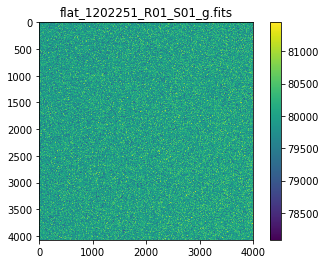

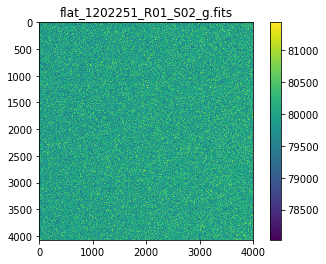

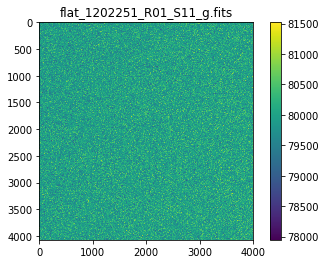

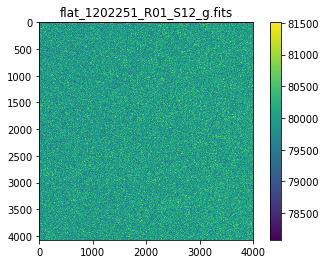

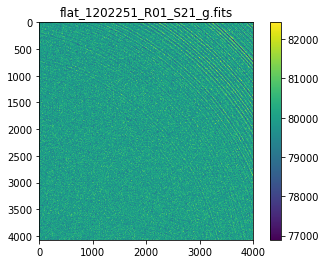

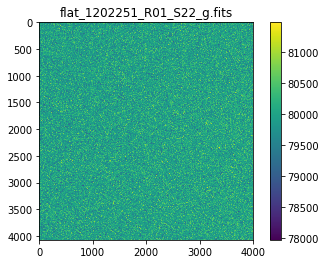

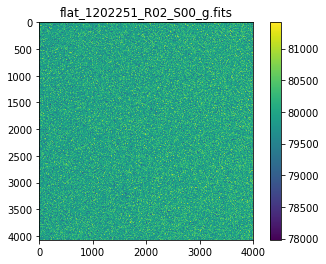

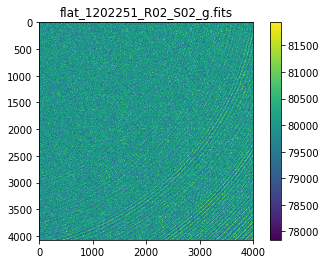

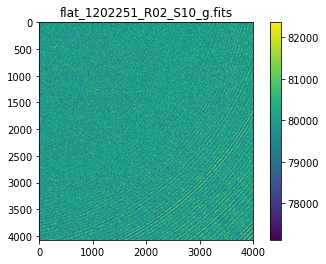

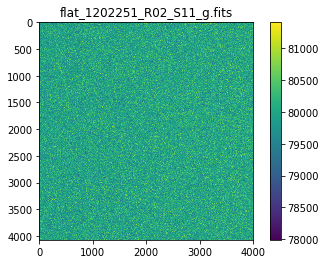

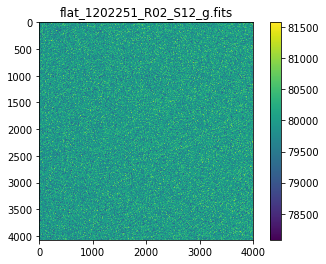

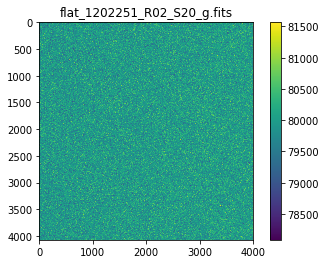

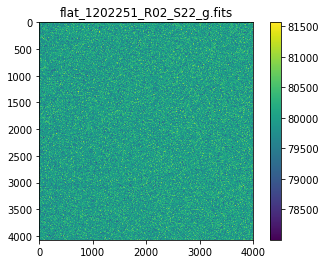

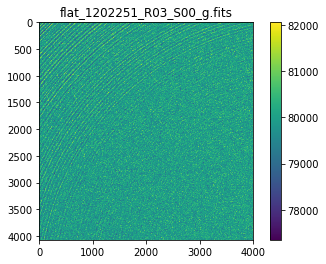

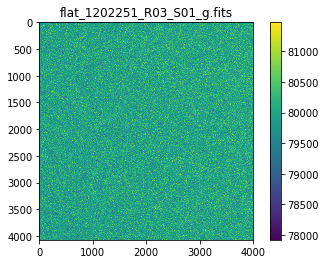

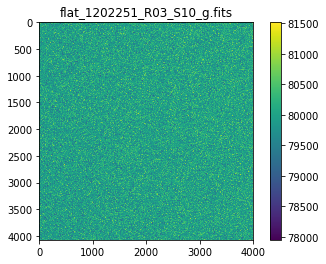

<Figure size 432x288 with 0 Axes>

In [21]:
image_arrays = []
for flat_image in flat_images:
    image_file = fits.getdata(flat_image)
    plt.imshow(image_file)
    plt.title(flat_image)
    plt.colorbar()
    plt.figure()
    image_arrays.append(image_file)

In [23]:
diff = image_arrays[0]-image_arrays[1]
plt.imshow(diff)
plt.colorbar()

In [26]:
shape(diff)

(4072, 4000)

In [20]:
import treecorr

In [32]:
mesh = [[i for i in range(shape(diff)[0])] for j in range(shape(diff)[1])]

In [39]:
x,y = np.meshgrid(np.linspace(0, 4071, 4072), np.linspace(0,3999,4000))

In [41]:
y

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+00, 2.000e+00, 2.000e+00, ..., 2.000e+00, 2.000e+00,
        2.000e+00],
       ...,
       [3.997e+03, 3.997e+03, 3.997e+03, ..., 3.997e+03, 3.997e+03,
        3.997e+03],
       [3.998e+03, 3.998e+03, 3.998e+03, ..., 3.998e+03, 3.998e+03,
        3.998e+03],
       [3.999e+03, 3.999e+03, 3.999e+03, ..., 3.999e+03, 3.999e+03,
        3.999e+03]])

In [56]:
cat = treecorr.Catalog(k=diff, x=x, y=y)

min_sep = 0.1
max_sep = 10
nbins = 24

corr = treecorr.KKCorrelation(min_sep=min_sep, max_sep=max_sep, nbins=nbins)

         Reshaping from (4000, 4072) to (16288000,)
         Reshaping from (4000, 4072) to (16288000,)
         Reshaping from (4072, 4000) to (16288000,)


AttributeError: Invalid parameter binslope.

In [44]:
corr.process(cat)

In [46]:
import seaborn as sns; sns.set_style('darkgrid')

In [48]:
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14

In [51]:
10**corr.logr

array([6.21378114e-03, 9.66580532e-03, 1.50355782e-02, 2.33884923e-02,
       3.63818113e-02, 5.65934810e-02, 8.80336075e-02, 1.36940084e-01,
       2.13016224e-01, 3.31355949e-01, 5.15438511e-01, 8.01786897e-01,
       1.24721420e+00, 1.94009563e+00, 3.01790266e+00, 4.69447812e+00,
       7.30246375e+00, 1.13592982e+01, 1.76698797e+01, 2.74862621e+01,
       4.27560695e+01, 6.65089154e+01, 1.03457494e+02, 1.60932607e+02])

In [54]:
plt.plot(10**corr.logr,corr.xi)